# 문제 1
- https://leetcode.com/contest/weekly-contest-319/problems/convert-the-temperature/

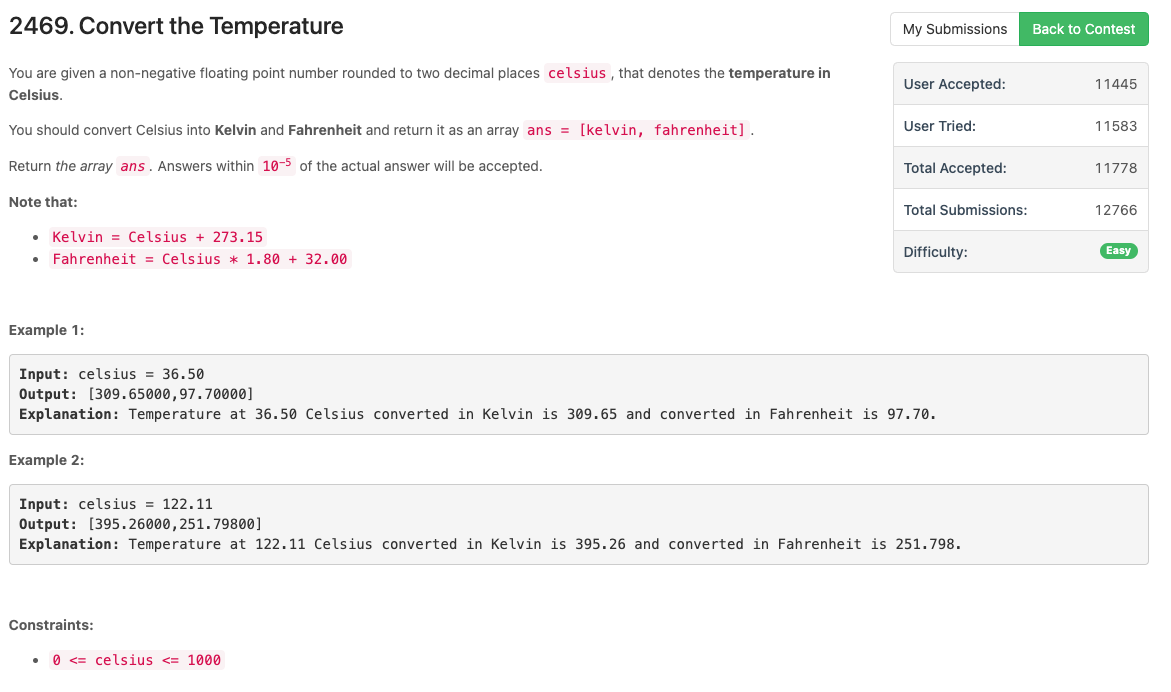

In [ ]:
class Solution:
    def convertTemperature(self, celsius: float) -> List[float]:
        return [celsius + 273.15, celsius*1.80 + 32.00]

# 문제 2
- https://leetcode.com/contest/weekly-contest-319/problems/number-of-subarrays-with-lcm-equal-to-k/
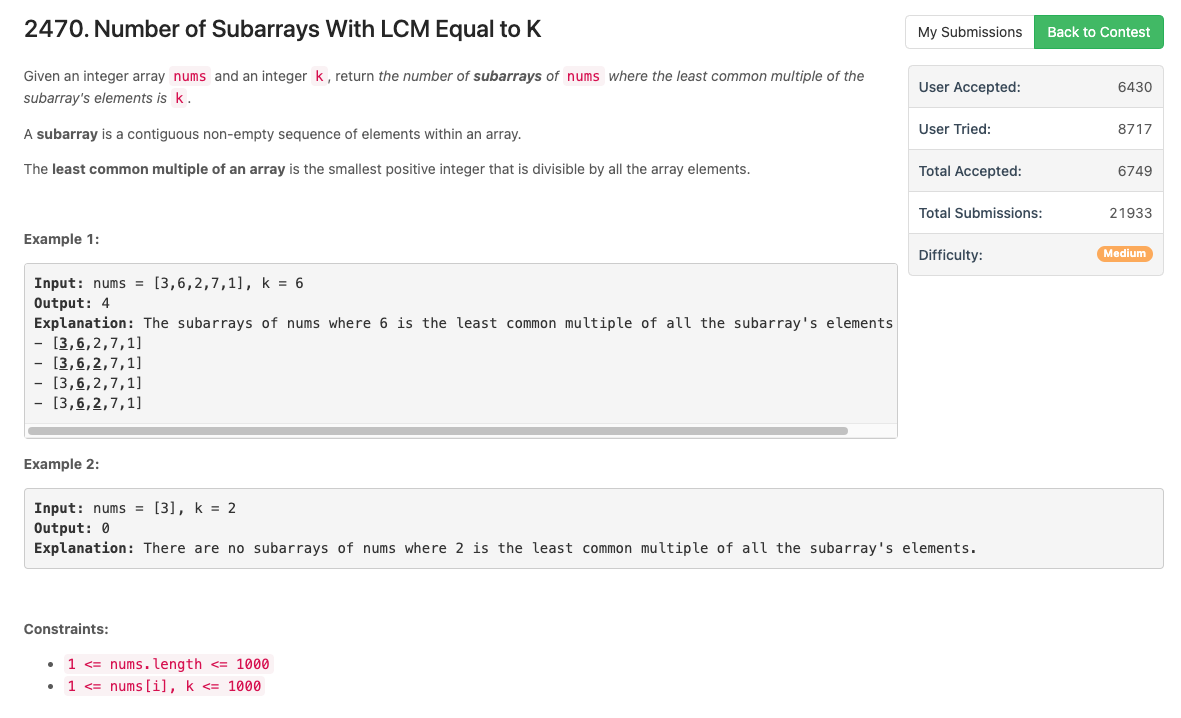

In [ ]:
# 최소공배수가 k인 sub array를 찾아라
class Solution:
    def subarrayLCM(self, nums: List[int], k: int) -> int:
        cnt = 0
        for i in range(len(nums)):
            tmp = nums[i]
            for j in range(i,len(nums)):
                if lcm(tmp, nums[j]) == k:
                    tmp = lcm(tmp,nums[j])
                    cnt += 1
                elif lcm(tmp, nums[j]) > k:
                    break
                else:
                    tmp = lcm(tmp,nums[j])
        return cnt

# 문제 3
- https://leetcode.com/contest/weekly-contest-319/problems/minimum-number-of-operations-to-sort-a-binary-tree-by-level/
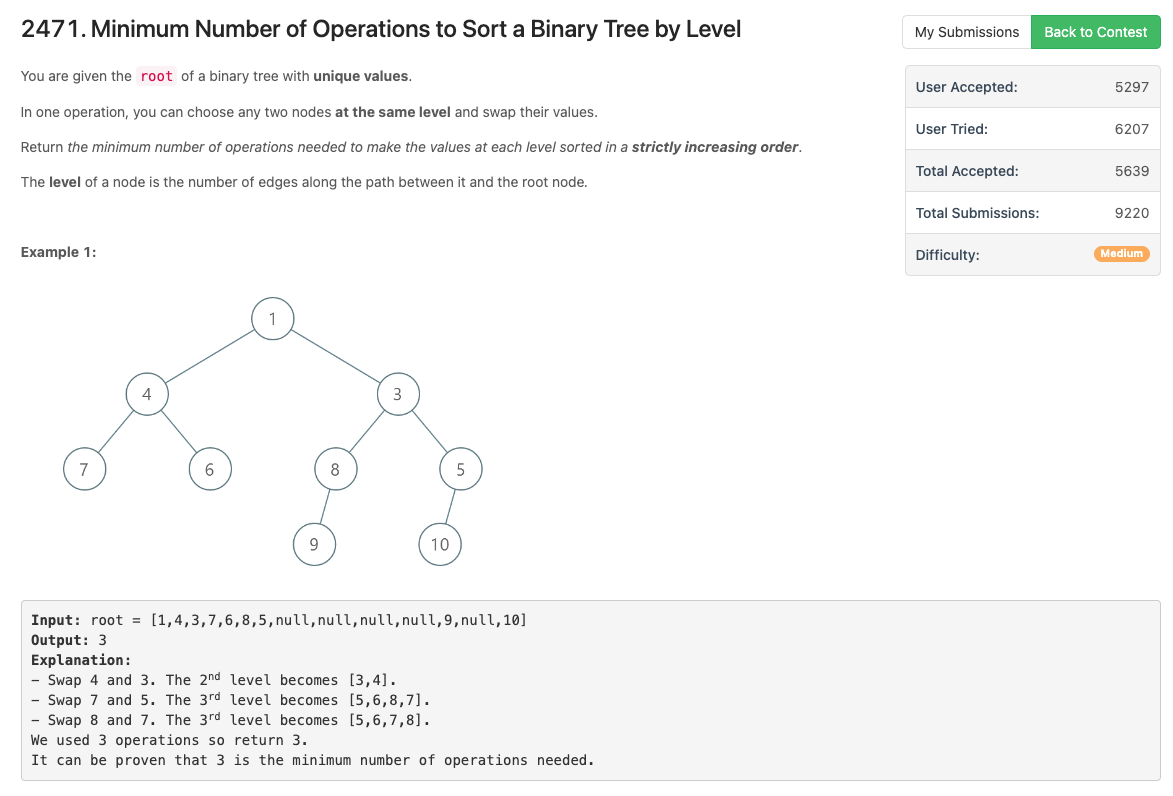

- 시간초과한 내 풀이

In [6]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
from collections import deque

class Solution:
    def minimumOperations(self, root: Optional[TreeNode]) -> int:
        cnt = 0
        q = deque()
        q.append(root)
        
        flag = False
        if root.val == 100000:
            flag = True
        
        while q: # level별로 한 iteration을 반복.
            vals = [] # 같은 level 안의 값들이 들어갈 리스트 생성
            for _ in range(len(q)): # 같은 level을 가진 level 별 비교가 가능하게끔 하기
                tree = q.popleft()
                if tree.val:
                    vals.append(tree.val)
                if tree.left:
                    q.append(tree.left)
                if tree.right:
                    q.append(tree.right)
            
            cnt_level = 0
            if flag:
                cnt_level += len(vals)//2
            else:
                s_vals = sorted(vals)
                c_index = []
                s_index = list(range(len(vals)))
                for i in range(len(s_vals)):
                    c_index.append(vals.index(s_vals[i]))


                if c_index == s_index[::-1]:
                    cnt_level += len(c_index)//2    
                else:
                    for i,idx in enumerate(c_index):
                        if i != idx:
                            target = c_index.index(i)
                            tmp = c_index[i]
                            c_index[i] = i
                            c_index[target] = tmp
                            cnt_level += 1

            cnt += cnt_level
            
        return cnt
    

[281, 25, 500, 96, 156, 495]

- 같은 아이디어로 잘 구현한 solution

In [ ]:
class Solution:                                                             # Ex:  root = [1, 4,3, 7,6,8,5, None,None,11,None,9,None,10,None]
    def minimumOperations(self, root: TreeNode) -> int:                     #           _____1____
                                                                            #          /          \
        ans, queue, level = 0, [root],[]                                    #         4___         3___
                                                                            #        /    \       /    \
        while queue :                                                       #       7     _6     8     _5
                                                                            #            /      /     /
            for node in queue:                                              #           11     9     10
                    if node:  level.extend([node.left, node.right])         #
                                                                            #  level         idx             ans
            arr = [(v,i) for i,v in enumerate([c.val for c in level if c])] #  –––––        –––––           –––––
            idx = [i for _,i in sorted(arr)]                                #  [4,3]        [1,0]             1
                                                                            #  [7,6,8,5]    [2,1,3,0]         2
            for i in range(len(idx)):                                       #  [11,9,10]    [1,2,0]           2
                while (idx[i] != i):                                        #                               –––––
                    j = idx[i]                                              #                                 5   <--- ans
                    idx[i], idx[j] = idx[j], idx[i]
                    ans += 1

            queue, level = level, []
        
        return ans